# Complex Network Analysis - Parts 3 & 4
## Master in BigData: SNA Lab - Exercises

This notebook contains exercises on complex network analysis and graph modeling using NetworkX.

**Prerequisites:**
- `facebook.ncol` file should be available in the working directory
- All required libraries should be installed

In [1]:
# Import required libraries
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random
import warnings
warnings.filterwarnings('ignore')

# Set matplotlib to display plots inline
%matplotlib inline

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


# Part 3. Plotting graphs

## Exercise 1: Basic Graph Visualization
Load the Karate Club graph. Customize the visualization by:

- Color nodes by club (use the 'club' node attribute which is already attached to the node)
- Varying node sizes based on their degree
- position the nodes with the spring layout algorithm

In [3]:
karate_g = nx.karate_club_graph()
attrs = nx.get_node_attributes(karate_g, 'club')
attrs.values()

dict_values(['Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Officer', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer'])

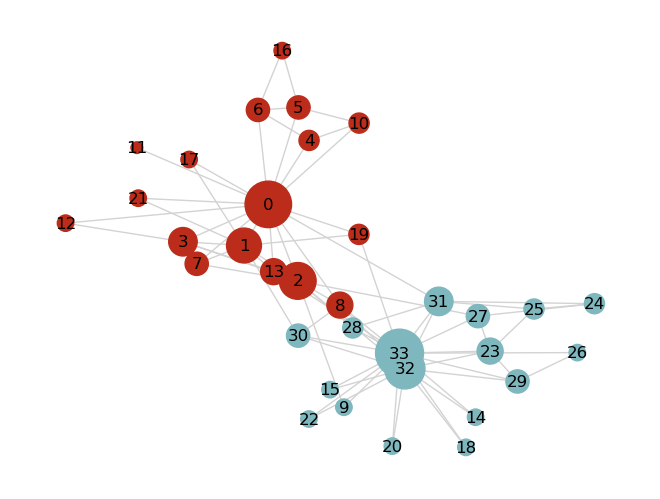

In [ ]:


# Get club membership for coloring
club_colors = {'Mr. Hi': '#BC2C1A', 'Officer': '#7FB7BE'}
node_colors = [club_colors[karate_g.nodes[n]['club']] for n in karate_g.nodes()]

# Node sizes proportional to degree
node_sizes = [karate_g.degree(n) * 70 for n in karate_g.nodes()]

# Spring layout
pos = nx.spring_layout(karate_g, seed=42)

nx.draw(
    karate_g,
    pos,
    with_labels=True,
    node_color=node_colors,
    node_size=node_sizes,
    edge_color='lightgray',
)

# Part 4. Degree Analysis

## **Exercise 2: Comparing Degree Distributions Across Networks**


Compare the degree distributions of four different real-world networks:
- **Facebook Network** (undirected)
- **Zachary's Karate Club**: (nx.karate_club_graph)
- **Florentine Families**: Historical marriage ties between powerful families in Renaissance Florence. (nx.florentine_families_graph)
- **Les Misérables**: Co-occurrence network of characters in Victor Hugo's novel *Les Misérables*. (nx.les_miserables_graph)

Steps:
1. Extract the degree of each node in the network.
2. Plot the degree distribution using histograms for each graph.
3. Compare the distributions visually
4. Report minimum and maximum degree for each graph.

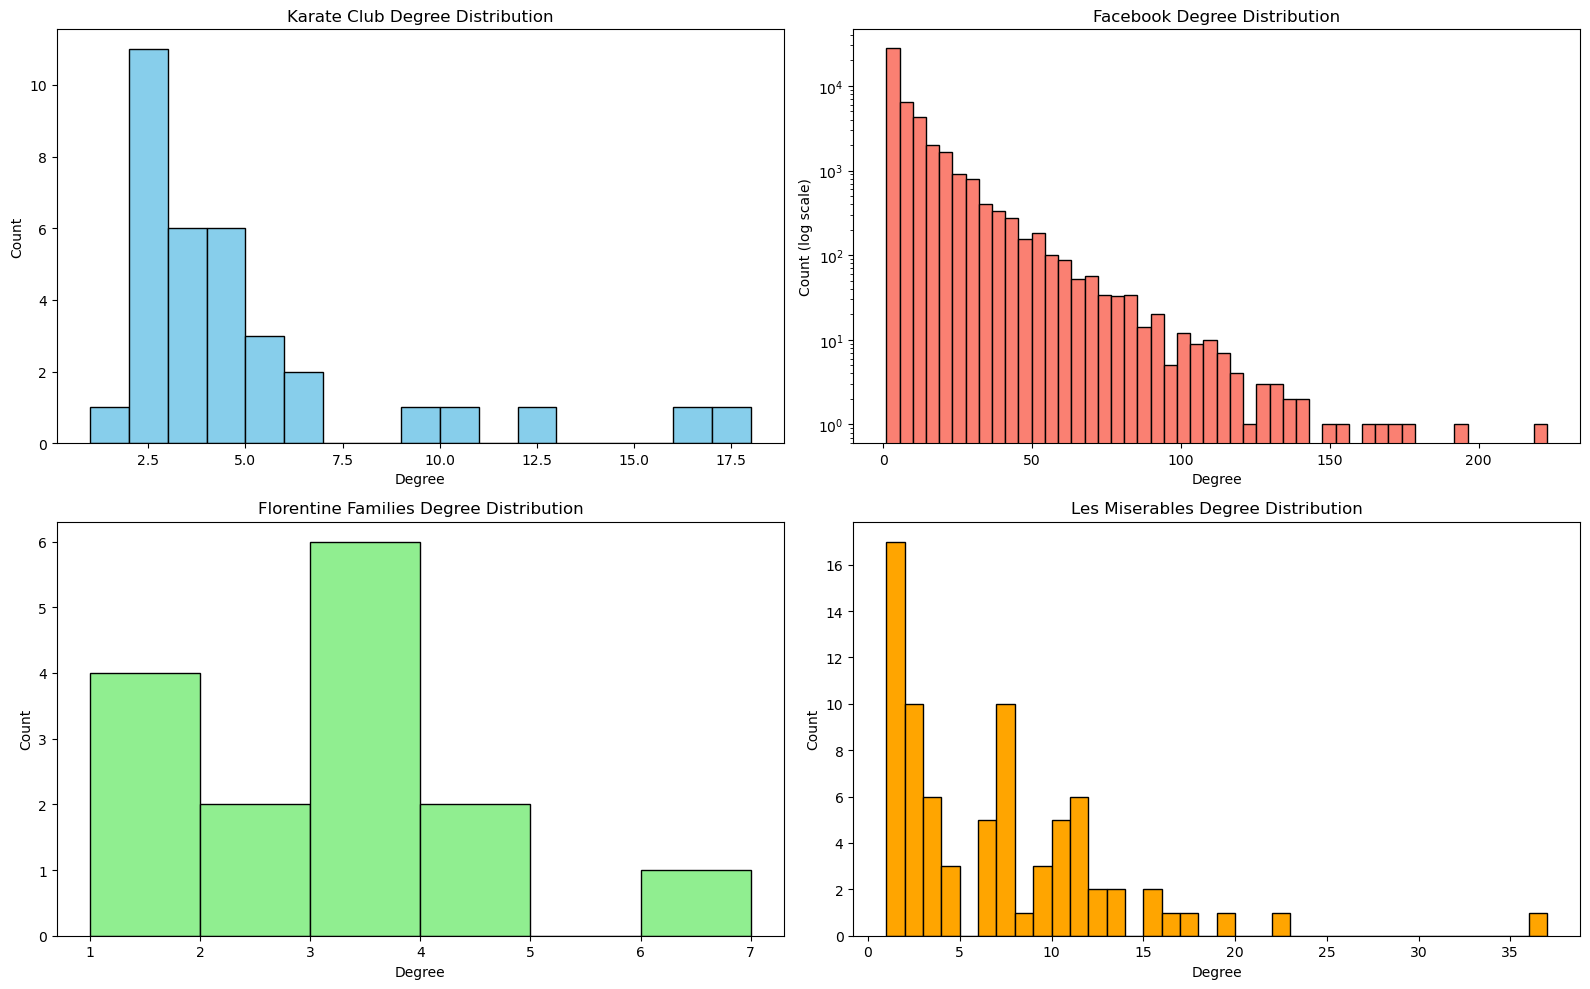

Karate Club degrees: min = 1 max = 17
Facebook degrees: min = 1 max = 223
Florentine Families degrees: min = 1 max = 6
Les Miserables degrees: min = 1 max = 36


In [8]:
fb = nx.read_weighted_edgelist('facebook.ncol', create_using=nx.Graph(), nodetype=int)

# Degree sequences
karate_degrees = [karate_g.degree(n) for n in karate_g.nodes()]
facebook_degrees = [fb.degree(n) for n in fb.nodes()]

# Florentine families graph
florentine_g = nx.florentine_families_graph()
florentine_degrees = [florentine_g.degree(n) for n in florentine_g.nodes()]

# Les Miserables graph
lesmis_g = nx.les_miserables_graph()
lesmis_degrees = [lesmis_g.degree(n) for n in lesmis_g.nodes()]

# Plot degree distributions
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.hist(karate_degrees, bins=range(1, max(karate_degrees)+2), color='skyblue', edgecolor='black')
plt.title("Karate Club Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")

plt.subplot(2, 2, 2)
plt.hist(facebook_degrees, bins=50, color='salmon', edgecolor='black', log=True)
plt.title("Facebook Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count (log scale)")

plt.subplot(2, 2, 3)
plt.hist(florentine_degrees, bins=range(1, max(florentine_degrees)+2), color='lightgreen', edgecolor='black')
plt.title("Florentine Families Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")

plt.subplot(2, 2, 4)
plt.hist(lesmis_degrees, bins=range(1, max(lesmis_degrees)+2), color='orange', edgecolor='black')
plt.title("Les Miserables Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

print("Karate Club degrees: min =", min(karate_degrees), "max =", max(karate_degrees))
print("Facebook degrees: min =", min(facebook_degrees), "max =", max(facebook_degrees))
print("Florentine Families degrees: min =", min(florentine_degrees), "max =", max(florentine_degrees))
print("Les Miserables degrees: min =", min(lesmis_degrees), "max =", max(lesmis_degrees))


## Exercise 3: the Friendship Paradox 

Friendship Paradox: “on average, your friends have more friends than you do” -> :(

Compare the average degree of all nodes to the average degree of their neighbors.

### Steps:

1. **Compute the average degree** of all nodes in the graph:

2. **For each node**, compute the average degree of its neighbors:

3. **Compute the global average of the neighbor degrees** across all nodes:


In [ ]:
G = nx.karate_club_graph()

# 1. Average degree of all nodes
degrees = dict(G.degree())
avg_degree = np.mean(list(degrees.values()))

# 2. Average neighbor degree for each node
avg_neighbor_degrees = {}
for node in G.nodes():
    neighbors = list(G.neighbors(node))
    if neighbors:
        avg_neighbor_degrees[node] = np.mean([degrees[neigh] for neigh in neighbors])
    else:
        avg_neighbor_degrees[node] = 0

# or use nx.average_neighbor_degree

# 3. Global average of neighbor degrees
global_avg_neighbor_degree = np.mean(list(avg_neighbor_degrees.values()))

print(f"Average degree of all nodes: {avg_degree:.2f}")
print(f"Global average of neighbor degrees: {global_avg_neighbor_degree:.2f}")

Average degree of all nodes: 4.59
Global average of neighbor degrees: 9.61


How many nodes satisfy the paradox condition?


In [ ]:
nodes_with_paradox = [node for node in G.nodes() if degrees[node] < avg_neighbor_degrees[node]]
paradox_fraction = len(nodes_with_paradox) / G.number_of_nodes()
print(f"Fraction of nodes satisfying the paradox condition: {paradox_fraction:.2f}")

Fraction of nodes satisfying the paradox condition: 0.85


## Exercise 4: Why does the paradox happen?

On the Karate Club graph, use random.choice() to perform sampling as follows:
1. **Uniform Sampling**:
   - Randomly sample 20 nodes from the graph.
   - Compute the average degree of the sampled nodes.

2. **Friend Sampling**:
   - Randomly select 20 edges.
   - For each edge, pick a random endpoint (simulating choosing a "friend").
   - Compute the average degree of these sampled nodes.
Compare the average degrees from both sampling methods.


In [ ]:
k = 20

# 1. Uniform sampling of k nodes
uniform_sample_degrees = []
for _ in range(k):
    node = random.choice(list(degrees.keys()))
    uniform_sample_degrees.append(degrees[node])

# 2. Friend sampling (via random edge and random endpoint)
edges = list(G.edges())
friend_sample_degrees = []
for _ in range(k):
    edge = random.choice(edges)
    node = random.choice(edge)  # pick a random endpoint
    friend_sample_degrees.append(degrees[node])

print("Uniform Sample Avg Degree:", sum(uniform_sample_degrees) / len(uniform_sample_degrees))
print("Friend Sample Avg Degree:", sum(friend_sample_degrees) / len(friend_sample_degrees))

Uniform Sample Avg Degree: 3.8
Friend Sample Avg Degree: 8.85


## Exercise 5: the Rich Club
- Load the undirected facebook graph
- Identify the top 10% of nodes by degree and build the induced subgraph.
- Measure density of links among them.
- Compare to the density of links in the rest of the network.



In [ ]:
import networkx as nx

# Load the facebook graph as an undirected graph
G = nx.read_weighted_edgelist('facebook.ncol', create_using=nx.Graph(), nodetype=int)
degrees = dict(G.degree())

# Sort nodes by degree in descending order
sorted_nodes = sorted(degrees.items(), key=lambda x: x[1], reverse=True)

# Define the top 10% nodes as the "rich club"
top_percent = 0.10
num_top_nodes = max(1, int(len(sorted_nodes) * top_percent))
rich_club_nodes = [node for node, deg in sorted_nodes[:num_top_nodes]]

# Create subgraph of the rich club
rich_club_subgraph = G.subgraph(rich_club_nodes)

# Compute the density among the rich club
rich_club_density = nx.density(rich_club_subgraph)

# Compute density among the rest of the nodes
rest_nodes = [node for node in G.nodes() if node not in rich_club_nodes]
rest_subgraph = G.subgraph(rest_nodes)
rest_density = nx.density(rest_subgraph)

print(f"Number of rich club nodes: {len(rich_club_nodes)}")
print(f"Rich club density: {rich_club_density:.4f}")
print(f"Rest of the network density: {rest_density:.4f}")

Number of rich club nodes: 4581
Rich club density: 0.0044
Rest of the network density: 0.0001
